In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('/kaggle/input/data-balita/data_balita.csv')
df

,Umur,Jenis_Kelamin,Tinggi_Badan,Status_Gizi
0,0,laki-laki,44.59,stunted
1,0,laki-laki,56.71,tinggi
2,0,laki-laki,46.86,normal
3,0,laki-laki,47.51,normal
4,0,laki-laki,42.74,severely stunted
...,...,...,...,...
120994,60,perempuan,100.60,normal
120995,60,perempuan,98.30,stunted
120996,60,perempuan,121.30,normal
120997,60,perempuan,112.20,normal


In [25]:
"""df = df.sample(frac=0.2, random_state=42)  # Mengambil 80% dari dataframe secara acak"""

'df = df.sample(frac=0.2, random_state=42)  # Mengambil 80% dari dataframe secara acak'

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Umur           120999 non-null  int64  
 1   Jenis_Kelamin  120999 non-null  object 
 2   Tinggi_Badan   120999 non-null  float64
 3   Status_Gizi    120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [27]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

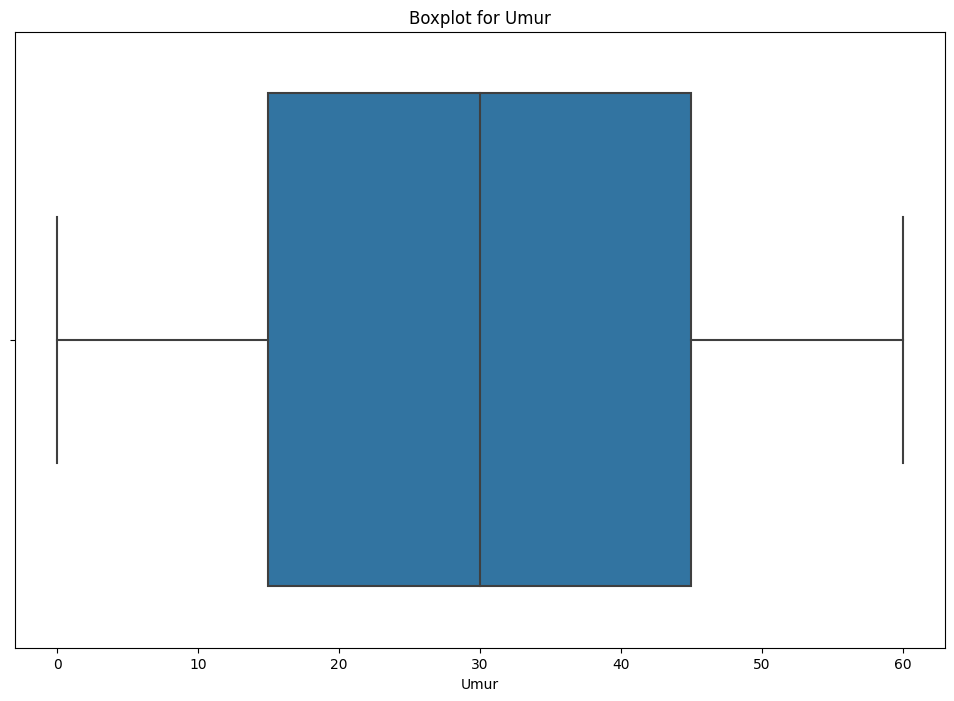

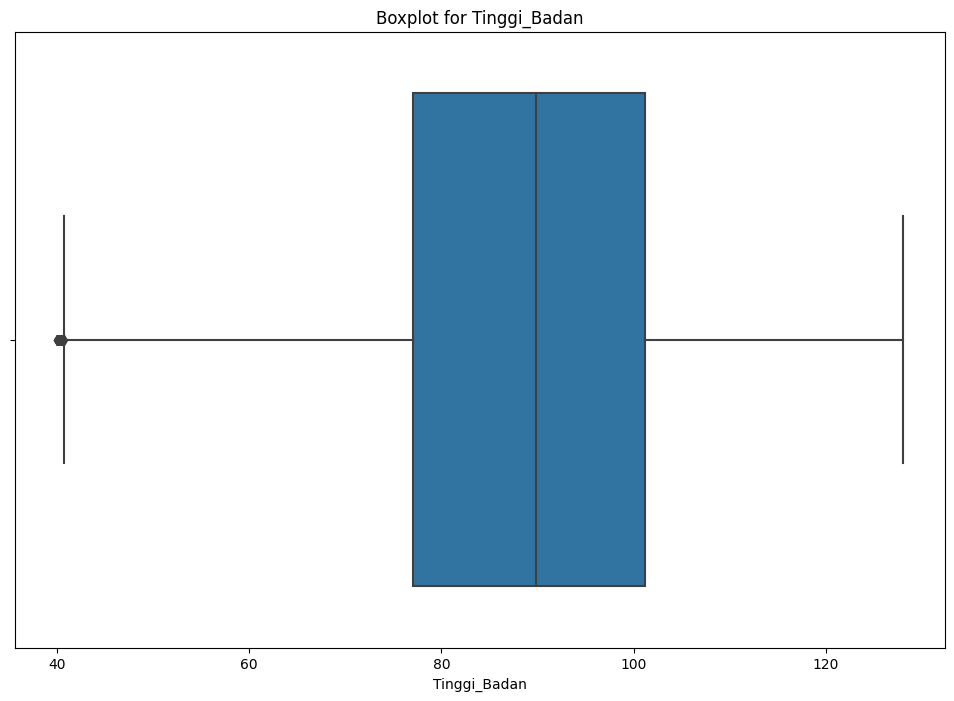

In [28]:
for column in numerical_columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=column, data=df)
    plt.title(f'Boxplot for {column}')
    plt.show()

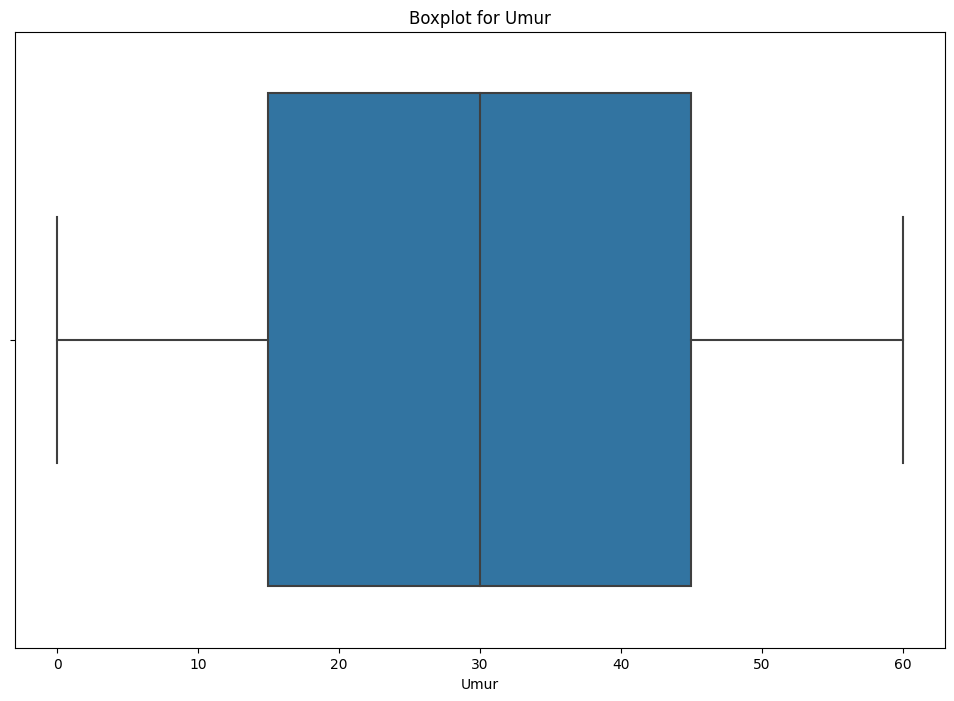

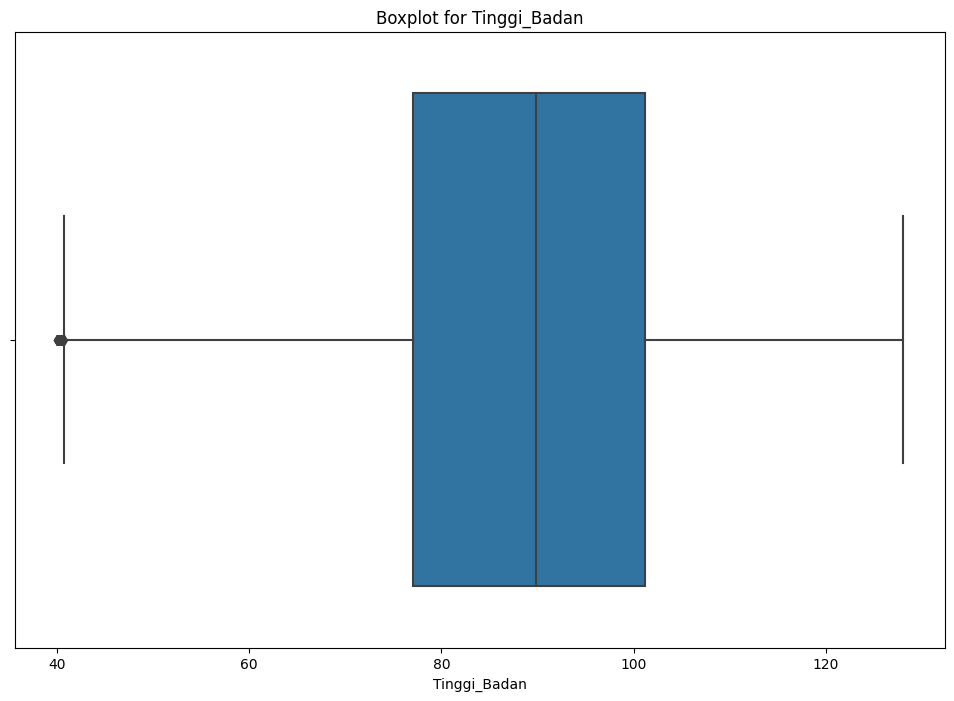

In [29]:
for column in numerical_columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=column, hue='Status_Gizi' , data=df)
    plt.title(f'Boxplot for {column}')
    plt.show()

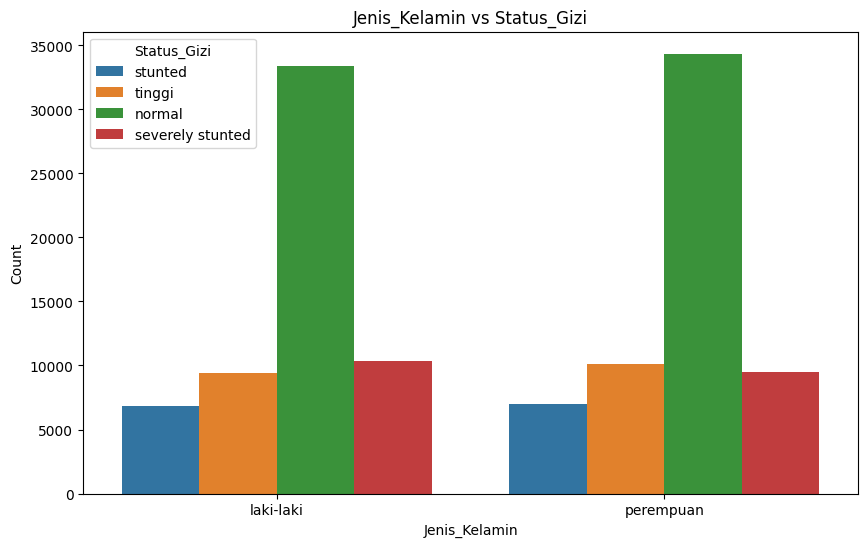

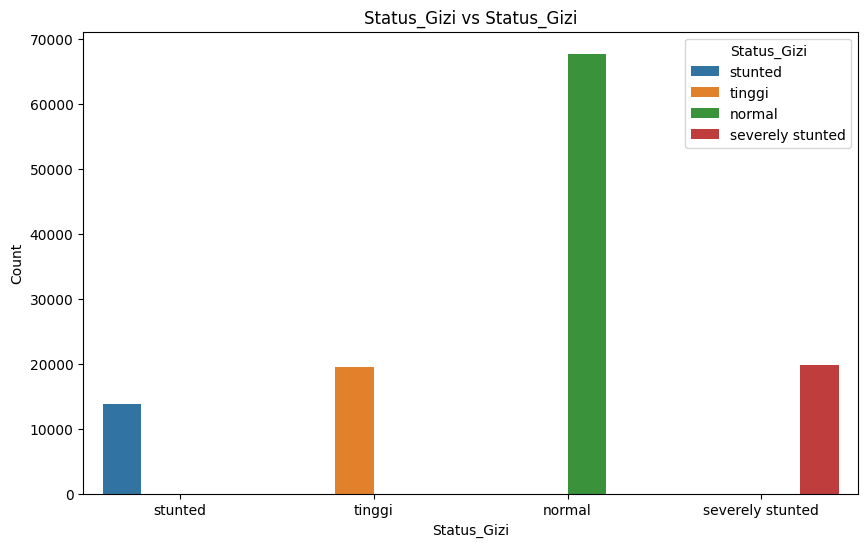

In [30]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Status_Gizi', data=df)
    plt.title(f'{column} vs Status_Gizi')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [31]:
for column in categorical_columns:
    value_counts = df[column].value_counts()
    print(f"Counts for {column}:\n{value_counts}\n")

Counts for Jenis_Kelamin:
Jenis_Kelamin
perempuan    61002
laki-laki    59997
Name: count, dtype: int64

Counts for Status_Gizi:
Status_Gizi
normal              67755
severely stunted    19869
tinggi              19560
stunted             13815
Name: count, dtype: int64



In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in categorical_columns:
    # Mencetak unique values sebelum label encoding
    print(f"Unique values untuk kolom '{column}' sebelum label encoding:")
    print(df[column].unique())
    # Melakukan label encoding
    df[column] = label_encoder.fit_transform(df[column])
    # Mencetak unique values setelah label encoding
    print(f"\nUnique values untuk kolom '{column}' setelah label encoding:")
    print(df[column].unique())
    print()

Unique values untuk kolom 'Jenis_Kelamin' sebelum label encoding:
['laki-laki' 'perempuan']

Unique values untuk kolom 'Jenis_Kelamin' setelah label encoding:
[0 1]

Unique values untuk kolom 'Status_Gizi' sebelum label encoding:
['stunted' 'tinggi' 'normal' 'severely stunted']

Unique values untuk kolom 'Status_Gizi' setelah label encoding:
[2 3 0 1]



In [33]:
df.describe()

,Umur,Jenis_Kelamin,Tinggi_Badan,Status_Gizi
count,120999.00,120999.00,120999.00,120999.00
mean,30.17,0.50,88.66,0.88
std,17.58,0.50,17.30,1.14
min,0.00,0.00,40.01,0.00
25%,15.00,0.00,77.00,0.00
50%,30.00,1.00,89.80,0.00
75%,45.00,1.00,101.20,2.00
max,60.00,1.00,128.00,3.00


In [34]:
df.corr()

,Umur,Jenis_Kelamin,Tinggi_Badan,Status_Gizi
Umur,1.00,-0.01,0.84,-0.15
Jenis_Kelamin,-0.01,1.00,-0.03,0.01
Tinggi_Badan,0.84,-0.03,1.00,-0.05
Status_Gizi,-0.15,0.01,-0.05,1.00


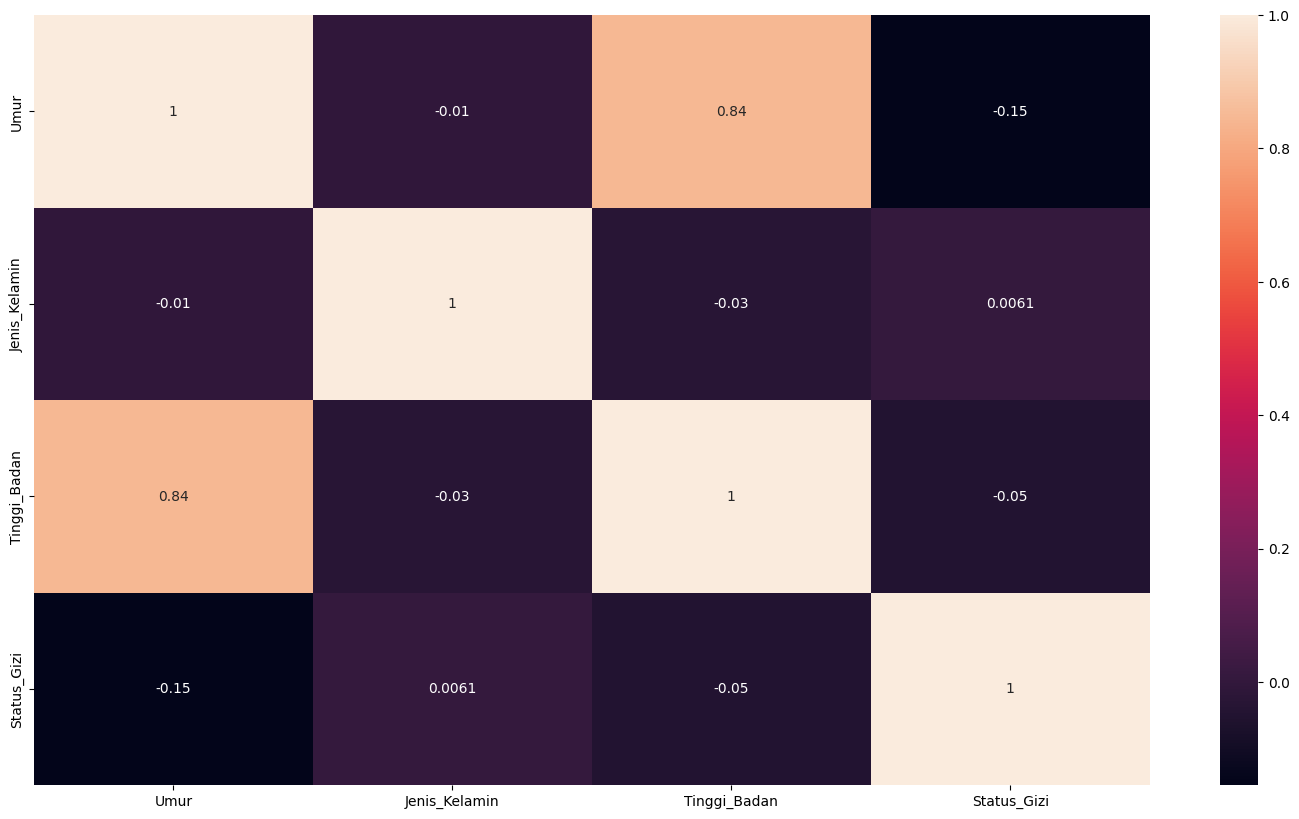

In [35]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [36]:
X = df.drop('Status_Gizi', axis=1)
y = df['Status_Gizi']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Jumlah baris dan kolom dari x_train adalah: \n', X_train.shape, ' \nSedangkan Jumlah baris dan kolom dari y_train adalah: \n', y_train.shape)
print('Persentase Stunting (1,2,3) dan Normal (0) di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah: \n', X_test.shape,'\nSedangkan Jumlah baris dan kolom dari y_test adalah: \n', y_test.shape)
print('Persentase Stunting (1,2,3) dan Normal (0) di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: 
 (96799, 3)  
Sedangkan Jumlah baris dan kolom dari y_train adalah: 
 (96799,)
Persentase Stunting (1,2,3) dan Normal (0) di data Training adalah:
Status_Gizi
0   0.56
1   0.16
3   0.16
2   0.11
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: 
 (24200, 3) 
Sedangkan Jumlah baris dan kolom dari y_test adalah: 
 (24200,)
Persentase Stunting (1,2,3) dan Normal (0) di data Testing adalah:
Status_Gizi
0   0.55
1   0.17
3   0.16
2   0.12
Name: proportion, dtype: float64


In [38]:
"!pip install lazypredict"

'!pip install lazypredict'

In [39]:
"""from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)"""

'from lazypredict.Supervised import LazyClassifier\nclf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)\nmodels,predictions = clf.fit(X_train, X_test, y_train, y_test)\n\nprint(models)'

In [40]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def plot_confusion_matrix(conf_mat):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

def evaluate(model):
    # Training the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Print evaluation metrics
    print("Akurasi Pelatihan:", model.score(X_train, y_train))
    print("Akurasi Testing:", model.score(X_test, y_test))
    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('Precision Score:', precision_score(y_test, y_pred, average='macro'))
    print('Recall Score:', recall_score(y_test, y_pred, average='macro'))
    print('F1 Score:', f1_score(y_test, y_pred, average='macro'))

    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix {model} :")
    print(conf_mat)

    # Cross-validation
    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Cross-validation scores:", cv_scores)
    print("Mean CV accuracy:", cv_scores.mean())

    # Plot Confusion Matrix
    plot_confusion_matrix(conf_mat)

    return conf_mat, cv_scores


Akurasi Pelatihan: 1.0
Akurasi Testing: 0.9990909090909091
Accuracy Score: 0.9990909090909091
Precision Score: 0.9988802105784367
Recall Score: 0.9987834468720834
F1 Score: 0.9988314971706481
Confusion Matrix RandomForestClassifier() :
[[13375     0     6     1]
 [    0  4129     1     0]
 [    1     4  2785     0]
 [    9     0     0  3889]]
Cross-validation scores: [0.99881198 0.99850207 0.99870868 0.99891529 0.99927682]
Mean CV accuracy: 0.998842967735766


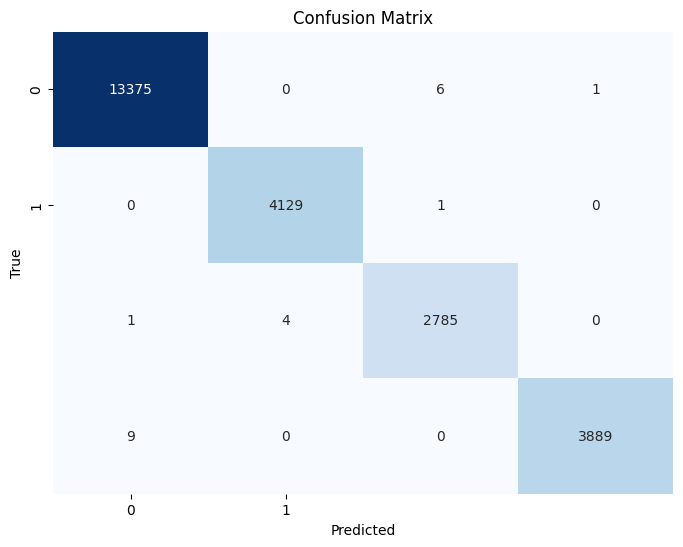

(array([[13375,     0,     6,     1],
        [    0,  4129,     1,     0],
        [    1,     4,  2785,     0],
        [    9,     0,     0,  3889]]),
 array([0.99881198, 0.99850207, 0.99870868, 0.99891529, 0.99927682]))

In [41]:
evaluate(RandomForestClassifier())

Akurasi Pelatihan: 1.0
Akurasi Testing: 0.9990909090909091
Accuracy Score: 0.9990909090909091
Precision Score: 0.9987380895735083
Recall Score: 0.9986723906866117
F1 Score: 0.9987051937081448
Confusion Matrix DecisionTreeClassifier() :
[[13376     0     5     1]
 [    0  4126     4     0]
 [    4     4  2782     0]
 [    4     0     0  3894]]
Cross-validation scores: [0.99829545 0.99839876 0.99839876 0.99865702 0.99865696]
Mean CV accuracy: 0.9984813910842503


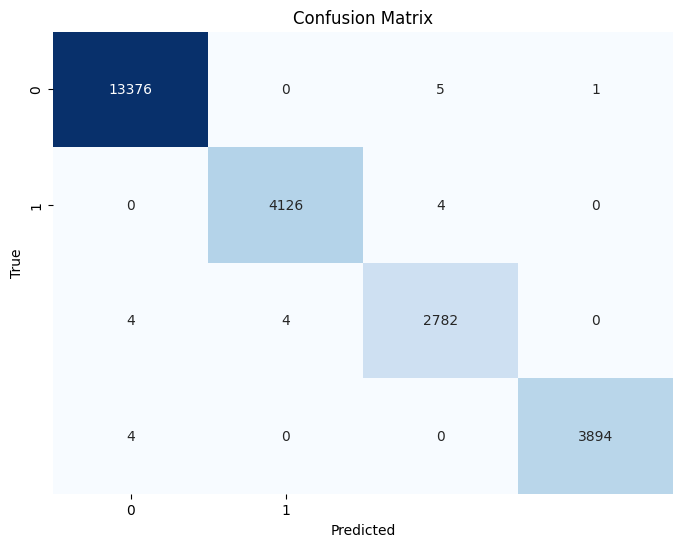

(array([[13376,     0,     5,     1],
        [    0,  4126,     4,     0],
        [    4,     4,  2782,     0],
        [    4,     0,     0,  3894]]),
 array([0.99829545, 0.99839876, 0.99839876, 0.99865702, 0.99865696]))

In [42]:
evaluate(DecisionTreeClassifier())

Akurasi Pelatihan: 1.0
Akurasi Testing: 0.9988429752066116
Accuracy Score: 0.9988429752066116
Precision Score: 0.9983992569960535
Recall Score: 0.9986076376132295
F1 Score: 0.9985033644064172
Confusion Matrix ExtraTreesClassifier() :
[[13370     0     6     6]
 [    0  4127     3     0]
 [    2     4  2784     0]
 [    7     0     0  3891]]
Cross-validation scores: [0.9990186  0.99881198 0.99876033 0.99886364 0.99891523]
Mean CV accuracy: 0.9988739557358806


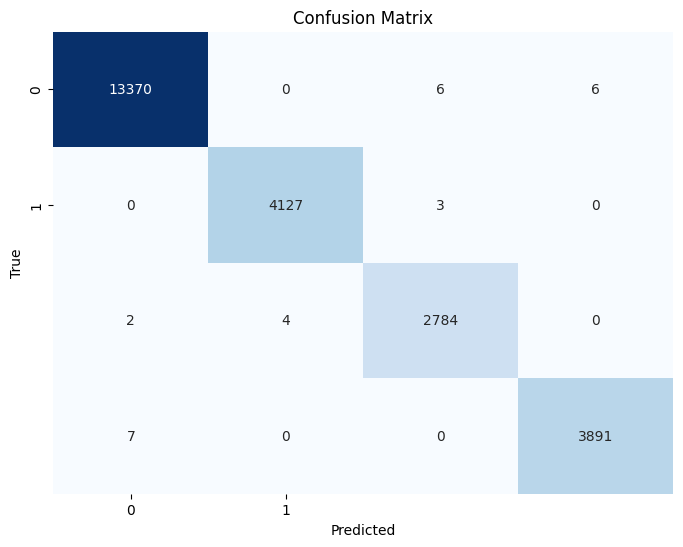

(array([[13370,     0,     6,     6],
        [    0,  4127,     3,     0],
        [    2,     4,  2784,     0],
        [    7,     0,     0,  3891]]),
 array([0.9990186 , 0.99881198, 0.99876033, 0.99886364, 0.99891523]))

In [43]:
evaluate(ExtraTreesClassifier())

Akurasi Pelatihan: 0.9999483465738283
Akurasi Testing: 0.9990082644628099
Accuracy Score: 0.9990082644628099
Precision Score: 0.9988837848948224
Recall Score: 0.9985114439649104
F1 Score: 0.9986974134839319
Confusion Matrix BaggingClassifier() :
[[13376     0     5     1]
 [    0  4128     2     0]
 [    6     3  2781     0]
 [    7     0     0  3891]]
Cross-validation scores: [0.99839876 0.99839876 0.99829545 0.9982438  0.99855364]
Mean CV accuracy: 0.9983780842318627


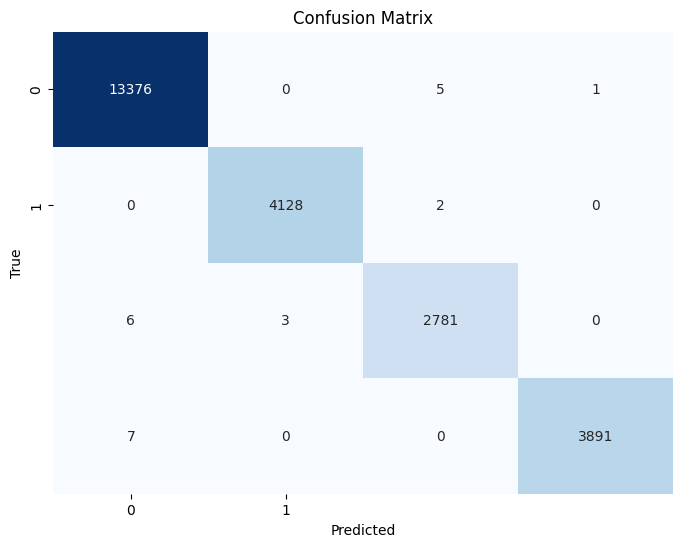

(array([[13376,     0,     5,     1],
        [    0,  4128,     2,     0],
        [    6,     3,  2781,     0],
        [    7,     0,     0,  3891]]),
 array([0.99839876, 0.99839876, 0.99829545, 0.9982438 , 0.99855364]))

In [44]:
evaluate(BaggingClassifier())

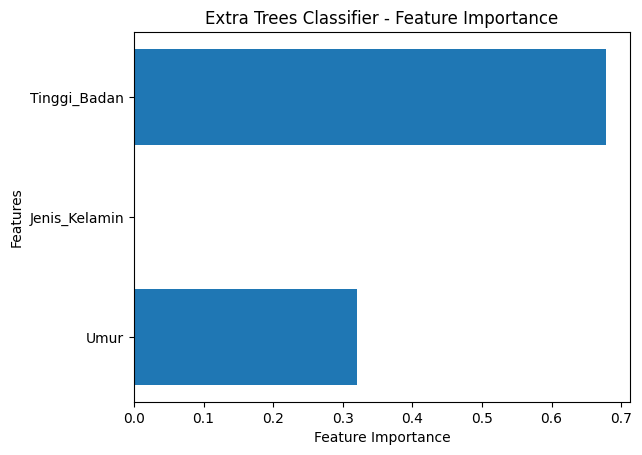

In [45]:
et = ExtraTreesClassifier()
et = et.fit(X_train,y_train)
feature_importances = et.feature_importances_
features = X.columns

plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Extra Trees Classifier - Feature Importance')
plt.show()